In [7]:
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np

In [8]:
u = mda.Universe('top.pdb', 'PEG400_0.0.dcd')
proteins = u.select_atoms('protein')
num_proteins = len(proteins.segments)
print("Number of proteins: ", num_proteins)

Number of proteins:  200


/home/c2sy/anaconda3/envs/MDAnalysis/lib/python3.13/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [9]:
num_bins = 200
z_min = 0
z_max = u.dimensions[2] 
bin_edges = np.linspace(z_min, z_max, num_bins+1)
bin_volume = np.prod(u.dimensions[:3])*0.001
bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])*0.1

In [10]:
density_collector = np.zeros(num_bins)
for ts in u.trajectory:
    zcoordinates = proteins.positions[:, 2]

    hist, _ = np.histogram(zcoordinates, bins=bin_edges)
    density_collector += hist

avg_density = density_collector/u.trajectory.n_frames
num_density = avg_density/bin_volume

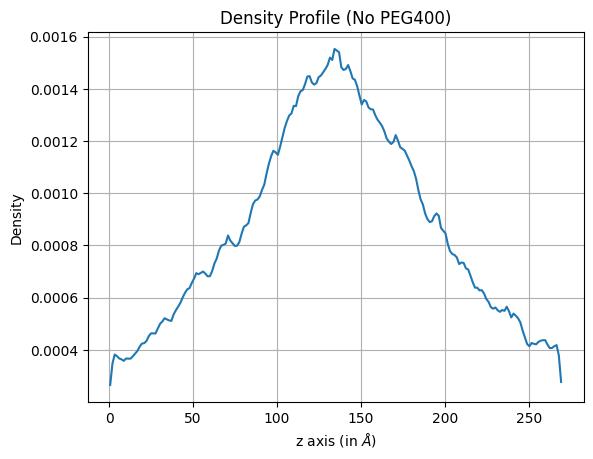

In [11]:
plt.plot(bin_centers, num_density)
plt.xlabel(r'z axis (in $\AA$)')
plt.ylabel('Density')
plt.title("Density Profile (No PEG400)")
plt.grid(True)
plt.show()